# 1. Imports

In [135]:
import numpy as np
import pandas as pd
from datetime import datetime, date, timedelta

import inflection
import math

import seaborn as sns
import matplotlib.pyplot as plt 

from IPython.core.display import HTML
from IPython.display import Image

sns.set_theme()

# 2. Funções

# 3. Carregando os dados

Importando os dados de treino com dados de venda

In [2]:
df_sales = pd.read_csv('data/train.csv', low_memory = False)
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Importando dados das lojas

In [3]:
df_store = pd.read_csv('data/store.csv', low_memory = False)
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_raw = pd.merge(df_sales, df_store, how = 'left', on = 'Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 4. Descrição

## 4.1 Renomeando Colunas

In [16]:
df1 = df_raw.copy()

In [17]:
# usando a função underscore do módulo inflection deixando todas as primeiras letras das palavas em minúsculo
cols_pre = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'] 

snakecase = lambda x: inflection.underscore(x) 

cols_new = list(map(snakecase, cols_pre))
df1.columns = cols_new
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
df1.shape

(1017209, 18)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

Transformando a coluna date em formato de data.

In [20]:
df1['date'] = pd.to_datetime(df1['date'])
df1['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1017209 entries, 0 to 1017208
Series name: date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.5 MB


## 4.2 Tratamento Valores Nulos

In [21]:
df1.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

A variável competition_distance representa a distância da loja concorrente mais próxima. Vamos considerar que as lojas com valores nulos não têm concorrentes próximos ou estão muito distantes para serem considerados competidores. Para preencher esses valores nulos, usaremos um número bem acima do maior valor encontrado nesta coluna. Será colocado o dobro do maior valor.

In [22]:
#competition_distance  
max_value = df1['competition_distance'].max()

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 2*(max_value) if math.isnan(x) else x)

As variáveis competition_open_since_month e competition_open_since_year são as datas de abertura da loja concorrente, alguns valores nulos podem corresponder a ausência de concorrente próximo, mas, como há um valor elevado ausentes, podem não haver este registro. Mas, para manter esta variável e verificar sua importância no modelo os valores nulos serão preenchidos com a mesma data da coluna 'date' na respectiva linha.

In [23]:
#competition_open_since_month    
df1['competition_open_since_month'] = list(map(lambda x: x[0].month if math.isnan(x[1]) else x[1], 
                                         df1[['date', 'competition_open_since_month']].values))


#competition_open_since_year     
df1['competition_open_since_year'] = list(map(lambda x: x[0].year if math.isnan(x[1]) else x[1], 
                                         df1[['date', 'competition_open_since_year']].values))

As variáveis Promo2_since_week e Promo2_since_year  descrevem a semana/ano em que a loja participou da promo2. Promo2 representa se a loja participou da continuação da promoção. Verificando os casos nulos estes representam que a loja não participou. Então, semelhante aos casos anteriores, estas linhas serão preenchidas com a semana/ano com base na coluna 'date'.

In [24]:
#promo2_since_week               
df1['promo2_since_week'] = list(map(lambda x: x[0].week if math.isnan(x[1]) else x[1], 
                            df1[['date', 'promo2_since_week']].values))

#promo2_since_year               
df1['promo2_since_year'] = list(map(lambda x: x[0].year if math.isnan(x[1]) else x[1], 
                            df1[['date', 'promo2_since_year']].values))
             

A variavel promo_interval descreve os meses em que a promo2 ficou ativa. Os valores nulos serão preenchidos com 0 e será criada uma outra variável que observará se a data (date) foi está no período da promo_interval, indicando uma compra na promoção.

In [25]:
#promo_interval 
df1['promo_interval'].fillna(0, inplace = True)

# criando uma variável com o mês de date
df1['month_date'] = df1.apply(lambda x: x['date'].strftime('%b'), axis = 1)

df1['is_promo'] = list(map(lambda x: 1 if (x[1] !=0) and (x[0] in x[1]) else 0, 
                            df1[['month_date', 'promo_interval']].values))

In [26]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_date                      0
is_promo                        0
dtype: int64

In [27]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [28]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_date                              object
is_promo                                 int64
dtype: object

## 4.3 Análise descritiva

### 4.3.1 Variáveis Númericas

In [82]:
num_df = df1.select_dtypes('number')

num_df.agg(["mean","median","std","min","max",
                    "skew","kurtosis"]).T.reset_index().rename(columns={'index': 'columns'})

,columns,mean,median,std,min,max,skew,kurtosis
0,store,558.429727,558.0,321.908651,1.0,1115.0,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.997391,1.0,7.0,0.001593,-1.246873
2,sales,5773.818972,5744.0,3849.926175,0.0,41551.0,0.641460,1.778375
3,customers,633.145946,609.0,464.411734,0.0,7388.0,1.598650,7.091773
4,open,0.830107,1.0,0.375539,0.0,1.0,-1.758045,1.090723
5,promo,0.381515,0.0,0.485759,0.0,1.0,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.677842,0.815154
7,competition_distance,5810.044888,2330.0,10715.012901,20.0,151720.0,7.593832,90.447876
8,competition_open_since_month,6.786849,7.0,3.311087,1.0,12.0,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,5.515593,1900.0,2015.0,-7.235657,124.071304


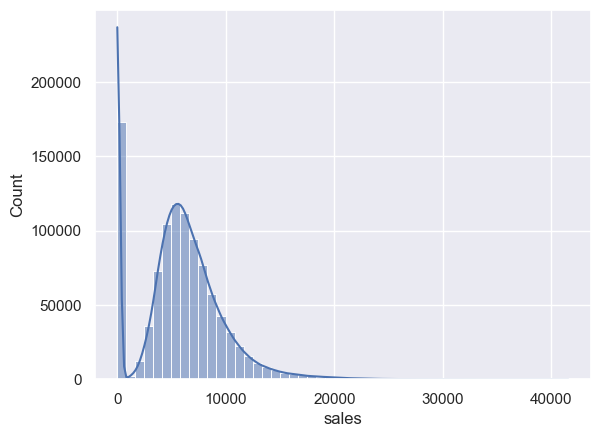

In [30]:
sns.histplot(df1['sales'], kde = True, bins = 50);

### 4.3.2 Variáveis Númericas

In [31]:
cat_df = df1.select_dtypes('object')
cat_df.describe().T

,count,unique,top,freq
state_holiday,1017209,4,0,986159
store_type,1017209,4,a,551627
assortment,1017209,3,a,537445
promo_interval,1017209,4,0,508031
month_date,1017209,12,May,103695


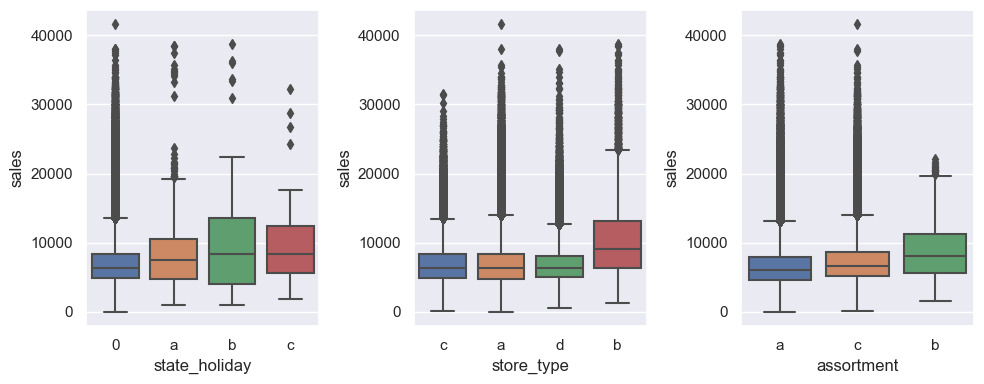

In [45]:
df_aux = df1[(df1['sales'] > 0)]
plt.subplots(figsize = (10,4))

plt.subplot(1,3,1)
sns.boxplot(x= 'state_holiday', y = 'sales', data = df_aux);
plt.tight_layout()

plt.subplot(1,3,2)
sns.boxplot(x= 'store_type', y = 'sales', data = df_aux);
plt.tight_layout()


plt.subplot(1,3,3)
sns.boxplot(x= 'assortment', y = 'sales', data = df_aux);
plt.tight_layout()


## 5. Feature Engineering

In [84]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_date,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


### 5.1 Mapa mental de Hipóteses

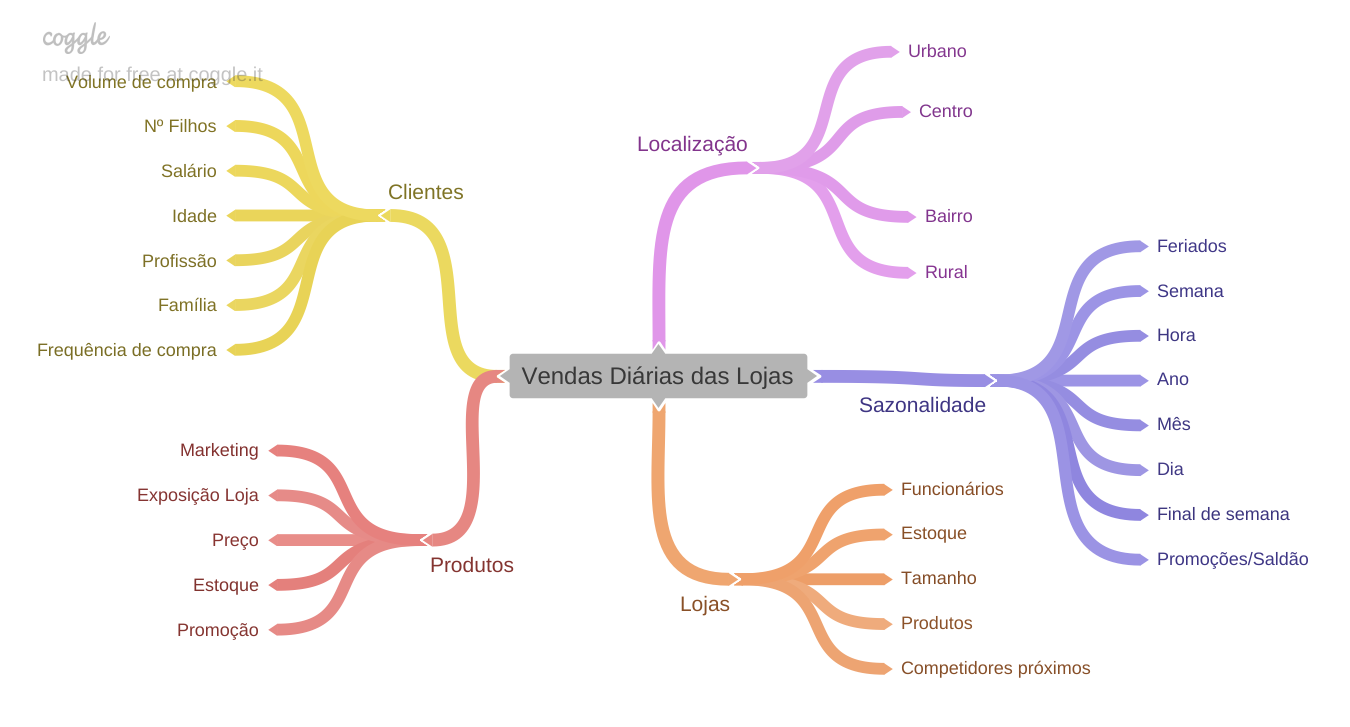

In [87]:
Image('images/mindmap.png')

### 5.2 Criação das Hipóteses

Hipóteses criadas a partir do mapa mental.

### 5.2.1 Loja

***1 -*** Lojas com mais funcionários vendem mais  
***2 -*** Lojas com maior estoque vende mais  
***3 -*** Lojas com maior porte vendem mais  
***4 -*** Lojas com maior variedade de produtos vendem mais  
***5 -*** Lojas com competidores mais próximos vendem menos  
***6 -*** Lojas com competidores há mais tempo vendem mais  

### 5.2.2 Produto

***1 -*** Lojas que investem mais em marketing vendem mais  
***2 -*** Lojas que expõe mais os produtos nas vitrines vendem mais  
***3 -*** Lojas com preços menores nos produtos vendem mais  
***4 -*** Lojas com promoções maiores vendem mais  
***5 -*** Lojas com promoções ativas por mais tempo vendem mais  
***6 -*** Lojas com mais promoções consecutivas vendem mais

### 5.2.3 Tempo

***1 -*** Lojas com mais feriados vendem menos   
***2 -*** Lojas vende mais no Natal    
***3 -*** Lojas vendem mais ao longo dos anos  
***4 -*** Lojas vendem mais no ssegundo semestre  
***5 -*** Lojas vendem menos nos finais de semana

### 5.2.4 Lista Final Hipóteses

Hipóteses filtradas a partir dos dados existentes:

* Lojas com maior variedade de produtos vendem mais    
* Lojas com competidores mais próximos vendem menos  
* Lojas com competidores há mais tempo vendem mais  
* Lojas com promoções ativas por mais tempo vendem mais  
* Lojas com mais promoções consecutivas vendem mais
* Lojas com mais feriados vendem menos   
* Lojas vende mais no Natal
* Lojas vendem mais ao longo dos anos  
* Lojas vendem mais no ssegundo semestre  
* Lojas vendem menos nos finais de semana

In [92]:
df2 = df1.copy()

Extraindo os tempos necessários da variável date.

In [ ]:
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['week_year'] = df2['date'].dt.weekofyear
df2['year_and_week'] = df2['date'].dt.strftime('%Y-%W')

Criando variáveis para contagem de tempo de competição

In [ ]:
df2['competition_since'] = list(map(lambda x : datetime(year = x[0], 
                        month = x[1], day = 1), 
                        df2[['competition_open_since_year', 'competition_open_since_month']].values))

df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days)

Criando variáveis para contagem de tempo de promoção.

In [145]:
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-'+ df2['promo2_since_week'].astype(str)
df2['promo_since'] = list(map(lambda x: datetime.strptime(x + '-1', '%Y-%W-%w') - timedelta(days = 7), 
                df2['promo_since']))

df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(lambda x: x.days)

Colocando rótulos para variáveis categóricas.

In [150]:
#assortiment
df2['assortment_label'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extend')

#state_holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' 
                        else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [152]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


0           basic
1           basic
2           basic
3          extend
4           basic
            ...  
1017204     basic
1017205    extend
1017206    extend
1017207    extend
1017208    extend
Name: assortment_label, Length: 1017209, dtype: object